# Exploratory Data Analysis on Video Game Sales

In [159]:
# First we need to import the required packages from Python library
# We will be mainly using matplotlib and seaborn to creating the plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# Load the data
# The file is in csv and use the pandas functionality .read_csv to read and create a data frame for further analysis
vgsales = pd.read_csv("vgsales.csv")
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data Cleaning

In [161]:
# Explore the data more
print("checking the column names")
print(vgsales.columns)
print("###################################################################################")
print("More Information on type of the dataframe,  count of null values in each columns")
print(vgsales.info())
print("###################################################################################")
print("counting number of NaN values in each columns")
print(vgsales.isna().sum())

checking the column names
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')
###################################################################################
More Information on type of the dataframe,  count of null values in each columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  165

In [162]:
#It is the time to drop nan values and we may loose around maximum 271+58 data out of 16598
vgsales.dropna(inplace=True)
print("Number of rows missing after processing:\n")
print(vgsales.isnull().sum())
print(vgsales.head())

Number of rows missing after processing:

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28   

In [163]:
# It is clearly show that Year is in decimal format and its better to convert that into ingteger form for better readability
vgsales["Year"]=vgsales["Year"].astype(int)
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### quickly visualize correlations/patterns between different variables.

In [ ]:
sns.pairplot(data=vgsales);

## Data Exploration

### Game Releasing Trend Over the Years

In [ ]:
#To show the number of games released each year
# sns.countplot shows the count of occurrences of each unique value in a categorical variable.
sns.countplot(x ='Year', data=vgsales, color="skyblue")
plt.title("Number of Games Released per Year", weight='bold')
plt.ylabel("Numuber of Games")
plt.xlabel("Year")
plt.xticks(rotation=90);

### Number of Games Released in Each Genre

In [ ]:
#counting number of sales in each genre
vgsales["Genre"].value_counts()

In [ ]:
#bar plot for number of each genre
sns.countplot(x='Genre', data=vgsales, order= vgsales['Genre'].value_counts().index, color="skyblue")
plt.title("Number of Games per Genre", weight='bold')
plt.ylabel("Number of Games")
plt.xlabel("Genre of Video Games")
plt.xticks(rotation=90);

### Top 10 publishers

In [ ]:
# getting top 10 publishers from the data and plo
top_publisher= vgsales['Publisher'].value_counts().head(10)
print(top_publisher)

In [ ]:
# plotting top 10 publishers
sns.barplot(x=top_publisher.values, y=top_publisher.index, color="skyblue")
plt.title("Top 10 publishers", weight='bold')
plt.ylabel("Publisher")
plt.xlabel("Total Numuber of Released");


### Number of Games by Top Ten Publishers and Genre

In [ ]:
# Creating a pivot and that will make a nice table for publisher and genre
pivot_vg = vgsales.pivot_table(index='Publisher', columns='Genre', values='Name', aggfunc='count').fillna(0)
pivot_vg_top = pivot_vg.loc[top10_publishers]

In [ ]:
# plot a heatmap that shows the number of sales of top 10 publishers and the thier genre
plt.figure(figsize=(11.5, 6.5))
sns.heatmap(pivot_pg_top, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of Number of Games by Top 10 Publisher and Genre", weight='bold')
plt.ylabel("Publisher")
plt.xlabel("Genre")
plt.tight_layout();

### Top 10 Games Based on Global Sale (in millions)

In [48]:
game_sales = vgsales.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)
print(game_sales)

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.82
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Modern Warfare 3    30.83
New Super Mario Bros.             30.01
Call of Duty: Black Ops II        29.72
Name: Global_Sales, dtype: float64


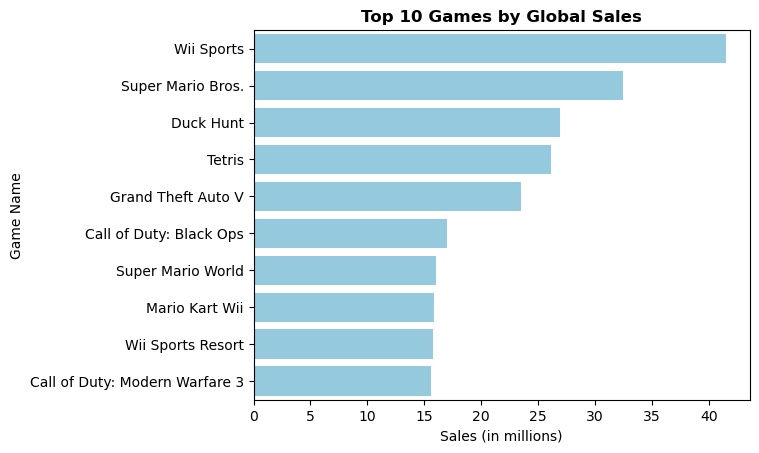

In [139]:
sns.barplot(x=game_sales.values, y=game_sales.index, color="skyblue")
plt.title("Top 10 Games by Global Sales", weight='bold')
plt.ylabel("Game Name")
plt.xlabel("Sales (in millions)");

### Top 10 Games Based on Regional Sales (in millions)

In [56]:
# Extract the top 10 games salaes from each regions
game_sales_NA = vgsales.groupby('Name')['NA_Sales'].sum().sort_values(ascending=False).head(10)
game_sales_EU = vgsales.groupby('Name')['EU_Sales'].sum().sort_values(ascending=False).head(10)
game_sales_JP = vgsales.groupby('Name')['JP_Sales'].sum().sort_values(ascending=False).head(10)
game_sales_OT = vgsales.groupby('Name')['Other_Sales'].sum().sort_values(ascending=False).head(10)
print(game_sales_NA)
print(game_sales_EU)
print(game_sales_JP)
print(game_sales_OT)

Name
Wii Sports                        41.49
Super Mario Bros.                 32.48
Duck Hunt                         26.93
Tetris                            26.17
Grand Theft Auto V                23.46
Call of Duty: Black Ops           17.01
Super Mario World                 15.99
Mario Kart Wii                    15.85
Wii Sports Resort                 15.75
Call of Duty: Modern Warfare 3    15.58
Name: NA_Sales, dtype: float64
Name
Wii Sports                        29.02
Grand Theft Auto V                23.04
Mario Kart Wii                    12.88
FIFA 15                           12.40
Call of Duty: Modern Warfare 3    11.29
FIFA 16                           11.29
FIFA 14                           11.14
Call of Duty: Black Ops II        11.05
Wii Sports Resort                 11.01
Nintendogs                        11.00
Name: EU_Sales, dtype: float64
Name
Pokemon Red/Pokemon Blue              10.22
Pokemon Gold/Pokemon Silver            7.20
Super Mario Bros.                  

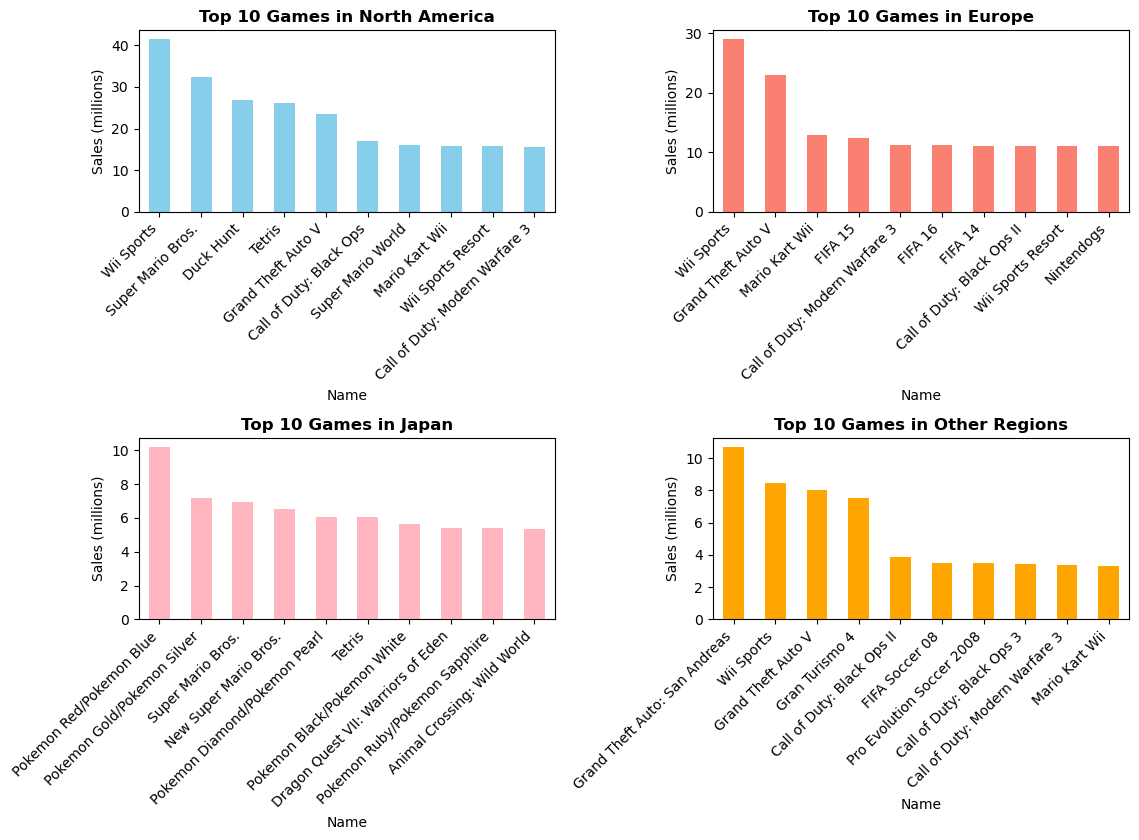

In [122]:
# plot top 10 games for four regions separately using capability of pandas plotting and matplotlib
fig, axes = plt.subplots(2, 2, figsize=(11.5, 8.5))
# NA
game_sales_NA.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_ylabel('Sales (millions)')
axes[0, 0].set_title('Top 10 Games in North America', fontweight='bold')
# EU
game_sales_EU.plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_ylabel('Sales (millions)')
axes[0, 1].set_title('Top 10 Games in Europe', fontweight='bold')
# JP
game_sales_JP.plot(kind='bar', ax=axes[1, 0], color='lightpink')
axes[1, 0].set_ylabel('Sales (millions)')
axes[1, 0].set_title('Top 10 Games in Japan', fontweight='bold')
# Other
game_sales_OT.plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_ylabel('Sales (millions)')
axes[1, 1].set_title('Top 10 Games in Other Regions', fontweight='bold')
# Improve layout
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

### Sales per Region

          region    sales
0  North America  4327.65
1         Europe  2406.69
2          Japan  1284.27
3          Other   788.91


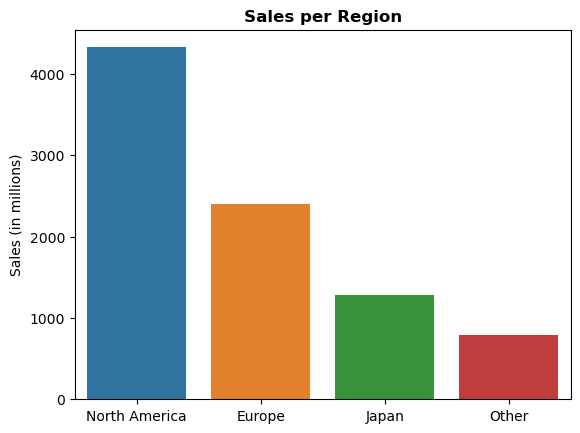

In [150]:
regions = {
    'NA_Sales': 'North America',
    'EU_Sales': 'Europe',
    'JP_Sales': 'Japan',
    'Other_Sales': 'Other'
}
# Sum sales across regions and rename index
regions_df = vgsales[list(regions.keys())].sum().rename(index=regions).reset_index()
regions_df.columns = ['region', 'sales']
print(regions_df)
sns.barplot(data=regions_df , x='region' , y='sales', hue='region')
plt.title("Sales per Region", weight="bold")
plt.xlabel("")
plt.ylabel("Sales (in millions)");

### Correlation between Global Sales and Regional Sales

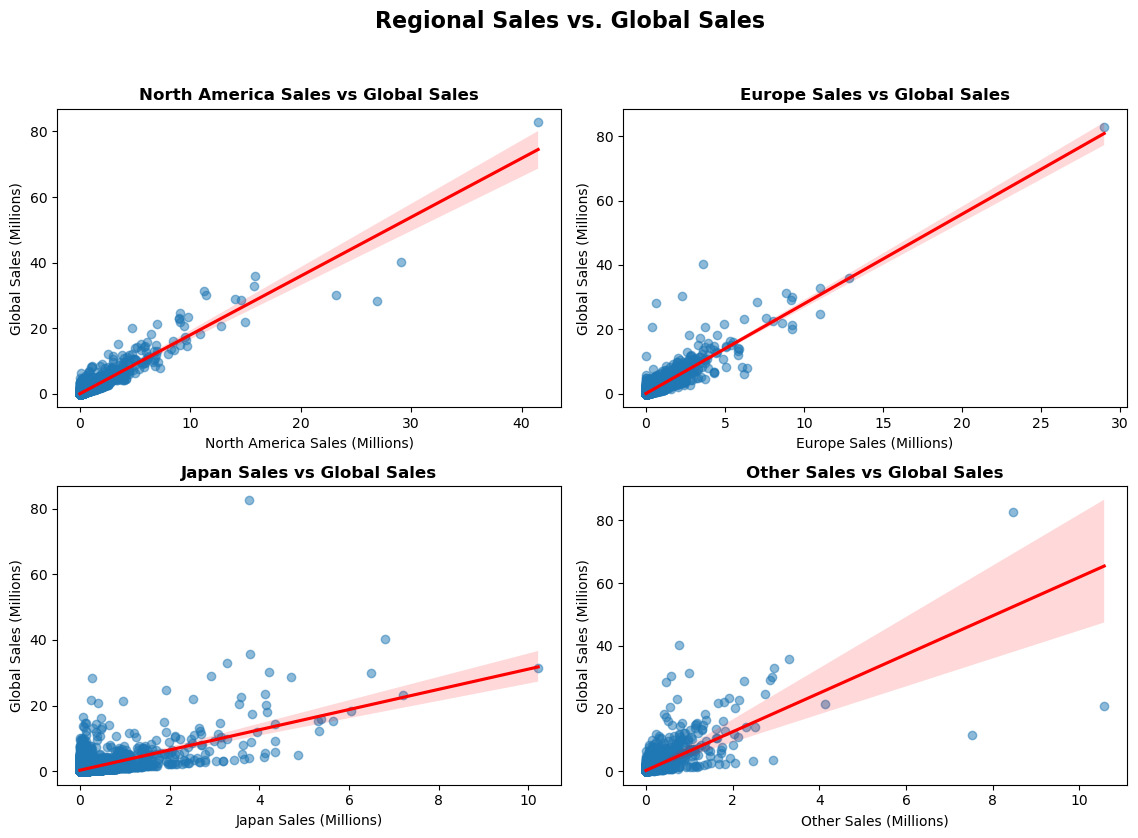

In [156]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
titles = ['North America', 'Europe', 'Japan', 'Other']
# Set up 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(11.5, 8.5))
fig.suptitle("Regional Sales vs. Global Sales", fontsize=16, fontweight="bold")
# Loop through and plot each region
for i, (region, title) in enumerate(zip(regions, titles)):
    row, col = divmod(i, 2)
    sns.regplot(x=region, y='Global_Sales', data=vgsales,
                scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=axes[row][col])
    axes[row][col].set_title(f"{title} Sales vs Global Sales", weight="bold")
    axes[row][col].set_xlabel(f"{title} Sales (Millions)")
    axes[row][col].set_ylabel("Global Sales (Millions)")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title

### Evolution of Video Game Sales Distribution Over the Years

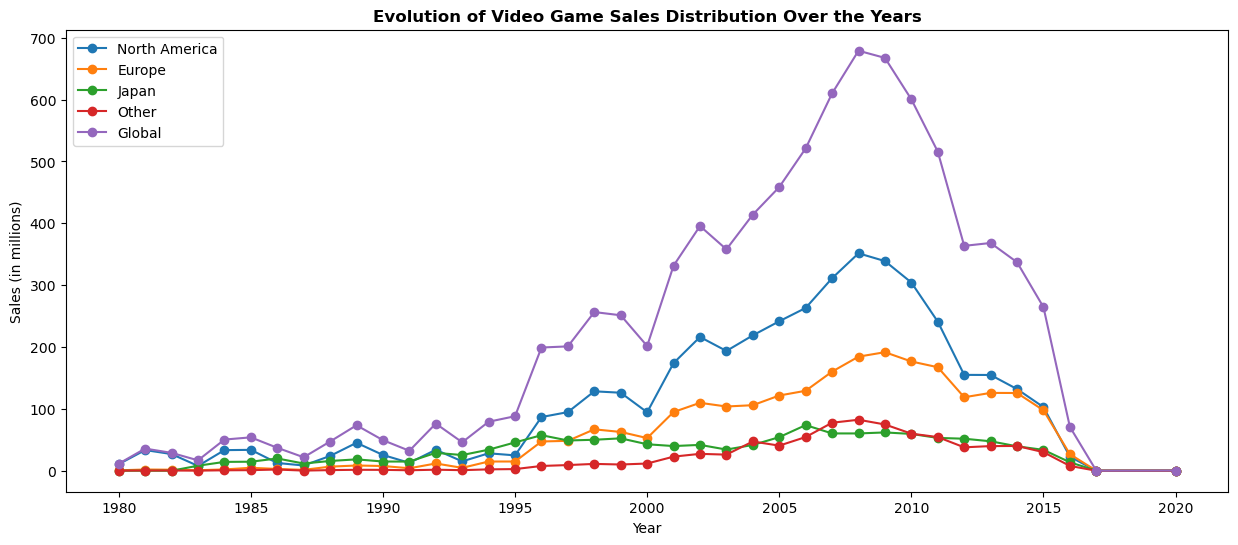

In [158]:
sales_by_year = vgsales.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
regions = {
    'Global_Sales': 'Global',
    'NA_Sales': 'North America',
    'EU_Sales': 'Europe',
    'JP_Sales': 'Japan',
    'Other_Sales': 'Other'
}
sales_by_year = sales_by_year.rename(columns=regions)
sales_by_year.plot(kind='line', marker='o', figsize=(15, 6))
plt.title('Evolution of Video Game Sales Distribution Over the Years', weight="bold")
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.legend(loc='upper left');

# Analysis Summary

### 1. The data shows more video games were released during 2008-2009 compared to other years.

### 2. "Action" and "Sports" are the top two most released game genres.

### 3. Electronic Arts published approximately 1,340 games during the study period (1980-2020).

### 4. A heatmap analysis reveals that Electronic Arts focused more on "Sports" genre, whereas Activision published more games in the "Action" genre.

### 5. "Wii Sports" tops the leaders table, followed by "Grand Theft Auto V", based on global sales.

### 6. Regional analysis shows "Wii Sports" is most popular in North America and Europe, while "Pokemon Red/Blue" leads in Japan.

### 7. Sales in North America outperform other regions.

### 8. Scatter plots indicate North America and Europe sales have strong correlations with global sales, while sales in Japan and other regions show greater variability.

### 9. The evolution of sales distribution shows video games gained popularity starting in 2000, peaked around 2008, and then experienced a decline in popularity afterwards.
